In [144]:
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import uproot
import mplhep as hep
import copy

In [82]:
"""
`with <expression> as <var>` has __enter__ and __exit__ methods
(!) remember to close your file; otherwise, the resources will be too consuming
"""
with uproot.open("QE_MC20_v4_r13167_HWWlvlv.root") as f:
    
    print(f.classnames()) # {"truth;1": "TTree"}
    # ;1 is a cycle number (it"s a convention like first version in ROOT) don"t care about it :)
    
    branches = f["truth;1"]              # select the tree and store its branches
    print(branches)                      # <TTree "truth" (31 branches) at MEMORY_ADDRESS>
    print(branches["higgs_pt"])          # Load the "pt" leaf from the "higgs" branch
    data = branches.arrays(library="np") # Load all branches as numpy arrays

{'truth;1': 'TTree'}
<TTree 'truth' (31 branches) at 0x00016d13f070>
<TBranch 'higgs_pt' at 0x00016d5b79a0>


In [84]:
lep_pos_pt = branches["lep_pos_pt"].array()
lep_pos_eta = branches["lep_pos_eta"].array()
lep_pos_phi = branches["lep_pos_phi"].array()
lep_pos_m = np.zeros_like(lep_pos_pt)  # assuming massless leptons for simplicity
nu_pt = branches["nu_pt"].array()
nu_eta = branches["nu_eta"].array()
nu_phi = branches["nu_phi"].array()
nu_m = np.zeros_like(nu_pt)  # assuming massless neutrinos for simplicity
w_pos_m = branches["w_pos_m"].array()

lep_neg_pt = branches["lep_neg_pt"].array()
lep_neg_eta = branches["lep_neg_eta"].array()
lep_neg_phi = branches["lep_neg_phi"].array()
lep_neg_m = np.zeros_like(lep_neg_pt)  # assuming massless leptons
anti_nu_pt = branches["anti_nu_pt"].array()
anti_nu_eta = branches["anti_nu_eta"].array()
anti_nu_phi = branches["anti_nu_phi"].array()
anti_nu_m = np.zeros_like(anti_nu_pt)  # assuming massless neutrinos
w_neg_m = branches["w_neg_m"].array()

In [ ]:
def px(pt, phi):
    return pt * np.cos(phi)

def py(pt, phi):
    return pt * np.sin(phi)

def pz(pt, eta):
    return pt * np.sinh(eta)

def energy(pt, eta, m):
    return np.sqrt(np.square(pt) + np.square(pz(pt, eta)) + np.square(m))

############################################################################

def pt(px, py):
    return np.sqrt(np.square(px) + np.square(py))

def eta(px, py, pz):
    pt = np.sqrt(np.square(px) + np.square(py))
    return np.arcsinh(np.divide(pz, pt))

def phi(px, py):
    return np.arctan2(py, px)

def m(e, px, py, pz):
    return np.sqrt(np.maximum(0, np.square(e) - np.square(px) - np.square(py) - np.square(pz)))

In [86]:
lep_pos_px = px(lep_pos_pt, lep_pos_phi)
lep_pos_py = py(lep_pos_pt, lep_pos_phi)
lep_pos_pz = pz(lep_pos_pt, lep_pos_eta)
lep_pos_E = energy(lep_pos_pt, lep_pos_eta, lep_pos_m)
nu_px = px(nu_pt, nu_phi)
nu_py = py(nu_pt, nu_phi)
nu_pz = pz(nu_pt, nu_eta)
nu_E = energy(nu_pt, nu_eta, nu_m)

lep_neg_px = px(lep_neg_pt, lep_neg_phi)
lep_neg_py = py(lep_neg_pt, lep_neg_phi)
lep_neg_pz = pz(lep_neg_pt, lep_neg_eta)
lep_neg_E = energy(lep_neg_pt, lep_neg_eta, lep_neg_m)
anti_nu_px = px(anti_nu_pt, anti_nu_phi)
anti_nu_py = py(anti_nu_pt, anti_nu_phi)
anti_nu_pz = pz(anti_nu_pt, anti_nu_eta)
anti_nu_E = energy(anti_nu_pt, anti_nu_eta, anti_nu_m)

In [ ]:
# Only four-vectors are valid in addition

recon_w_pos_px = lep_pos_px + nu_px
recon_w_pos_py = lep_pos_py + nu_py
recon_w_pos_pz = lep_pos_pz + nu_pz
recon_w_pos_E = lep_pos_E + nu_E
recon_w_pos_m = np.sqrt(np.square(recon_w_pos_E) - (np.square(recon_w_pos_px) + np.square(recon_w_pos_py) + np.square(recon_w_pos_pz)))

recon_w_neg_px = lep_neg_px + anti_nu_px
recon_w_neg_py = lep_neg_py + anti_nu_py
recon_w_neg_pz = lep_neg_pz + anti_nu_pz
recon_w_neg_E = lep_neg_E + anti_nu_E
recon_w_neg_m = np.sqrt(np.square(recon_w_neg_E) - (np.square(recon_w_neg_px) + np.square(recon_w_neg_py) + np.square(recon_w_neg_pz)))

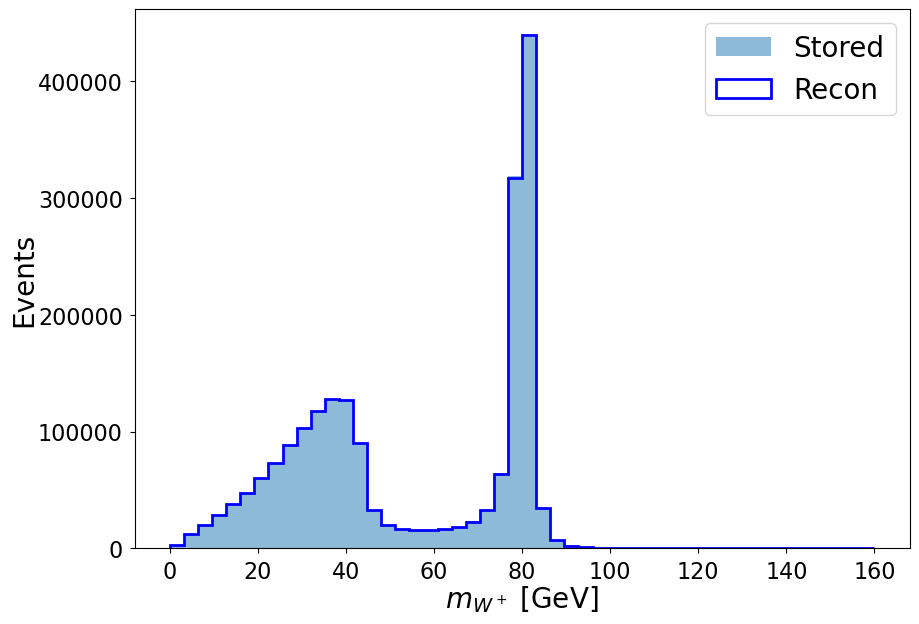

In [ ]:
fig = plt.figure(figsize=(10, 7))
bins_edges = np.linspace(0, 160, 51) # important to fix bins_edges
plt.hist(recon_w_pos_m * 1e-3, bins=bins_edges, histtype="bar", alpha=0.5, color="tab:blue", label=r"Stored")
plt.hist(w_pos_m * 1e-3, bins=bins_edges, histtype="step", linewidth=2, color="blue", label=r"Recon")
plt.legend(loc="best", fontsize=20)
plt.xlabel("$m_{W^+}$ [GeV]", fontsize=20, labelpad=0) # remember to include unit (in the proper order)
plt.ylabel("Events", fontsize=20, labelpad=0) 
plt.tick_params(axis="both", which="major", labelsize=16, pad=5)
# plt.yscale("log")
# plt.savefig("lepton_pt.pdf", bbox_inches="tight") # save in vector format (e.g., pdf), trim out extra white space
plt.show()

## Basic Python operators concepts

In [ ]:
# Section 1: '==' (Equality Operator: value-wise) Examples
print("Section 1: '==' Examples")
a = 10
b = 10
print(a == b)  # Output: True (values are both 10)

c = [1, 2, 3]
d = [1, 2, 3]
print(c == d)  # Output: True (lists have the same elements)

Section 1: '==' Examples
True
True


In [181]:
# Section 2: 'is' (Identity Operator: object-wise) Examples
print("\nSection 2: 'is' Examples")
a = 10
b = 10
print(a is b)  # Output: True (Python reuses small integers)

a_ = 100_000
b_ = 100_000
print(a_ is b_)  # Output: False (Python won't reuses large integers)

c = [1, 2, 3]
d = [1, 2, 3]
print(c is d)  # Output: False (different list objects)

e = c
print(c is e)  # Output: True (same object)


Section 2: 'is' Examples
True
False
False
True


In [ ]:
# Section 3: '==' vs 'is' Comparison Examples
print("\nSection 3: '==' vs 'is' Examples")
x = [1, 2, 3]
y = [1, 2, 3]
z = x
print(x == y)  # Output: True (same values)
print(x is y)  # Output: False (different objects)
print(x is z)  # Output: True (same object)

a = 100
b = 100
print(a == b)  # Output: True
print(a is b)  # Output: True (small integers, typically -5 to 256)

list1 = [1, 2, 3]
list2 = [1, 2, 3]
list3 = list1
print(list1 == list2)  # Output: True
print(list1 is list2)  # Output: False
print(list1 is list3)  # Output: True


Section 3: '==' vs 'is' Examples
True
False
True
True
True
True
False
True


In [ ]:
# Section 4: '&' (Bitwise AND Operator) Examples
print("\nSection 4: '&' Examples")
x = 5  # Binary: 0101
y = 3  # Binary: 0011
print(x & y)  # Output: 1 (Binary: 0001)

a = 10
b = 20
if (a > 5) & (b > 15):
    print("Both conditions are True with '&'")  # Output: Both conditions are True


Section 4: '&' Examples
1
Both conditions are True with '&'


In [184]:
# Section 5: 'and' (Logical AND Operator) Examples
print("\nSection 5: 'and' Examples")
age = 15
score = 85
if age > 12 and score > 80:
    print("Student qualifies with 'and'!")  # Output: Student qualifies with 'and'!

x = 0
if x != 0 and (10 / x > 2):
    print("This won't print")
else:
    print("and: Safe, because 'and' short-circuits")  # Output: and: Safe...

a = 5
b = 10
print(a > 0 and b > 15)  # Output: False (short-circuits)

print(5 and "Hello")  # Output: "Hello" (last evaluated operand)
print(0 and "Hello")  # Output: 0


Section 5: 'and' Examples
Student qualifies with 'and'!
and: Safe, because 'and' short-circuits
False
Hello
0


In [194]:
# Section 6: 'and' vs '&' Comparison Examples
print("\nSection 6: 'and' vs '&' Examples")
a = 5
b = 10
print((a > 0) & (b > 15))  # Output: False (both evaluated)
print(a > 0 and b > 15)    # Output: False (short-circuits)

# Short-circuit demo with potential error
x = 0
if x != 0 and (10 / x > 2):
    print("This won't run")
else:
    print("and: Safe!")  # Output: and: Safe!

# With '&' (may cause error if not in try-except)
try:
    if (x != 0) & (10 / x > 2):
        print("This won't run")
    else:
        print("&: Safe?")
except ZeroDivisionError:
    print("&: Error! Division by zero occurred.")  # Output: &: Error...

print(True & False)  # Output: False
print(5 & 3)         # Output: 1


Section 6: 'and' vs '&' Examples
False
False
and: Safe!
&: Error! Division by zero occurred.
False
1


In [ ]:
# Section 7: '.copy()' Method Examples
print("\nSection 7: '.copy()' Examples")
# Without .copy()
list1 = [1, 2, 3]
list2 = list1  # Same object
list2.append(4)
print(list1)  # Output: [1, 2, 3, 4] (original changed)
print(list1 is list2)  # Output: True

# With .copy()
list3 = [1, 2, 3]
list4 = list3.copy()  # New object
list4.append(4)
print(list3)  # Output: [1, 2, 3] (unchanged)
print(list4)  # Output: [1, 2, 3, 4]
print(list3 is list4)  # Output: False
print(list3 == list4)  # Output: False (after append)

# Shallow vs Deep Copy
list1 = [[1, 2], [3, 4]]
list2 = list1.copy()  # Shallow
list2[0].append(5)
print(list1)  # Output: [[1, 2, 5], [3, 4]] (nested affected)

list3 = copy.deepcopy(list1)  # Deep
list3[0].append(6)
print(list1)  # Output: [[1, 2, 5], [3, 4]] (unchanged)


Section 7: '.copy()' Examples
[1, 2, 3, 4]
True
[1, 2, 3]
[1, 2, 3, 4]
False
False
[[1, 2, 5], [3, 4]]
[[1, 2, 5], [3, 4]]


In [ ]:
# Section 8: NumPy Example
print("\nSection 8: NumPy '&' Example")
ages = np.array([15, 20, 25])
scores = np.array([70, 85, 90])
qualified = (ages > 18) & (scores > 80)
print(qualified)  # Output: [False  True  True]

try:
    print((ages > 18) and (scores > 80))  # ValueError
except (TypeError, ValueError) as err:
    print(err)


Section 8: NumPy '&' Example
[False  True  True]
The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

End of all discussion codes. Feel free to run and experiment!
